# Capstone Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Clustering Neighborhoods in the city of Toronto, Canada

In [3]:
from bs4 import BeautifulSoup
import requests

### Collecting data and Webscraping 
Extracts the information of Neighborhoods in the city of Toronto from wikipedia
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [4]:
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_content = requests.get(URL).text

In [5]:
# BeautifulSoup4 for webscraping
soup = BeautifulSoup(html_content, 'html.parser')

The dataframe consists of three columns: `PostalCode`,`Borough`,`Neighborhood`.

The `PostalCode` has `Not assigned` content is ignored.

In [6]:
# webscraping and data cleaning
import re
html_data = soup.tbody.find_all('p')
neighborhood_data = []
for i in range(len(html_data)):
    temp = html_data[i].span.get_text()
    if temp != 'Not assigned':  
        results = re.split(r'[(,/]',temp.rstrip(')'))
        borough = results[0].strip()
        neighborhoods = results[1:]
        for j in range(len(neighborhoods)):
            pocket = {}
            pocket['PostalCode'] = html_data[i].b.get_text()
            pocket['Borough'] = borough    
            pocket['Neighborhoods'] = neighborhoods[j].strip()
            neighborhood_data.append(pocket)
neighborhood_data

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhoods': 'Parkwoods'},
 {'PostalCode': 'M4A',
  'Borough': 'North York',
  'Neighborhoods': 'Victoria Village'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhoods': 'Regent Park'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhoods': 'Harbourfront'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhoods': 'Lawrence Manor'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhoods': 'Lawrence Heights'},
 {'PostalCode': 'M7A',
  'Borough': "Queen's Park",
  'Neighborhoods': 'Ontario Provincial Government'},
 {'PostalCode': 'M9A',
  'Borough': 'Etobicoke',
  'Neighborhoods': 'Islington Avenue'},
 {'PostalCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhoods': 'Malvern'},
 {'PostalCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhoods': 'Rouge'},
 {'PostalCode': 'M3B',
  'Borough': 'North York',
  'Neighborhoods': 'Don Mills)North'},
 {'PostalCode': 'M4B',
  'Borough

In [7]:
toronto_data = pd.DataFrame(neighborhood_data)
toronto_data.head(12)

PostalCode           Borough                  Neighborhoods
0         M3A        North York                      Parkwoods
1         M4A        North York               Victoria Village
2         M5A  Downtown Toronto                    Regent Park
3         M5A  Downtown Toronto                   Harbourfront
4         M6A        North York                 Lawrence Manor
5         M6A        North York               Lawrence Heights
6         M7A      Queen's Park  Ontario Provincial Government
7         M9A         Etobicoke               Islington Avenue
8         M1B       Scarborough                        Malvern
9         M1B       Scarborough                          Rouge
10        M3B        North York                Don Mills)North
11        M4B         East York                  Parkview Hill

#### Getting coordinates for each neighborhood

download the csv file from the given url and merge the data with `toronto_data`

In [8]:
import csv
import urllib.request

COORDS_DOWNLOAD_URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
response = urllib.request.urlopen(COORDS_DOWNLOAD_URL)
lat_lng_coords = pd.read_csv(response)

In [9]:
# prepare the coordinates for merging
lat_lng_coords.rename(columns={'Postal Code':'PostalCode'},inplace=True)

In [10]:
# merge the dataset with coordinates
toronto_data_with_coords = pd.merge(toronto_data, lat_lng_coords, how='left')

In [11]:
toronto_data_with_coords.head(12)

PostalCode           Borough                  Neighborhoods   Latitude  \
0         M3A        North York                      Parkwoods  43.753259   
1         M4A        North York               Victoria Village  43.725882   
2         M5A  Downtown Toronto                    Regent Park  43.654260   
3         M5A  Downtown Toronto                   Harbourfront  43.654260   
4         M6A        North York                 Lawrence Manor  43.718518   
5         M6A        North York               Lawrence Heights  43.718518   
6         M7A      Queen's Park  Ontario Provincial Government  43.662301   
7         M9A         Etobicoke               Islington Avenue  43.667856   
8         M1B       Scarborough                        Malvern  43.806686   
9         M1B       Scarborough                          Rouge  43.806686   
10        M3B        North York                Don Mills)North  43.745906   
11        M4B         East York                  Parkview Hill  43.706397   

    Longitude  
0  -79.329656  
1  -79.315572  
2  -79.360636  
3  -79.360636  
4  -79.464763  
5  -79.464763  
6  -79.389494  
7  -79.532242  
8  -79.194353  
9  -79.194353  
10 -79.352188  
11 -79.309937

### Explore Neighborhoods in Downtown Toronto

In [12]:
downtown_toronto = toronto_data_with_coords[toronto_data_with_coords['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_toronto

PostalCode           Borough            Neighborhoods   Latitude  Longitude
0         M5A  Downtown Toronto              Regent Park  43.654260 -79.360636
1         M5A  Downtown Toronto             Harbourfront  43.654260 -79.360636
2         M5B  Downtown Toronto          Garden District  43.657162 -79.378937
3         M5B  Downtown Toronto                  Ryerson  43.657162 -79.378937
4         M5C  Downtown Toronto           St. James Town  43.651494 -79.375418
5         M5E  Downtown Toronto              Berczy Park  43.644771 -79.373306
6         M5G  Downtown Toronto       Central Bay Street  43.657952 -79.387383
7         M6G  Downtown Toronto                 Christie  43.669542 -79.422564
8         M5H  Downtown Toronto                 Richmond  43.650571 -79.384568
9         M5H  Downtown Toronto                 Adelaide  43.650571 -79.384568
10        M5H  Downtown Toronto                     King  43.650571 -79.384568
11        M5J  Downtown Toronto        Harbourfront East  43.640816 -79.381752
12        M5J  Downtown Toronto            Union Station  43.640816 -79.381752
13        M5J  Downtown Toronto          Toronto Islands  43.640816 -79.381752
14        M5K  Downtown Toronto  Toronto Dominion Centre  43.647177 -79.381576
15        M5K  Downtown Toronto          Design Exchange  43.647177 -79.381576
16        M5L  Downtown Toronto           Commerce Court  43.648198 -79.379817
17        M5L  Downtown Toronto           Victoria Hotel  43.648198 -79.379817
18        M5S  Downtown Toronto    University of Toronto  43.662696 -79.400049
19        M5S  Downtown Toronto                  Harbord  43.662696 -79.400049
20        M5T  Downtown Toronto        Kensington Market  43.653206 -79.400049
21        M5T  Downtown Toronto                Chinatown  43.653206 -79.400049
22        M5T  Downtown Toronto              Grange Park  43.653206 -79.400049
23        M5V  Downtown Toronto                 CN Tower  43.628947 -79.394420
24        M5V  Downtown Toronto         King and Spadina  43.628947 -79.394420
25        M5V  Downtown Toronto            Railway Lands  43.628947 -79.394420
26        M5V  Downtown Toronto        Harbourfront West  43.628947 -79.394420
27        M5V  Downtown Toronto            Bathurst Quay  43.628947 -79.394420
28        M5V  Downtown Toronto            South Niagara  43.628947 -79.394420
29        M5V  Downtown Toronto           Island airport  43.628947 -79.394420
30        M4W  Downtown Toronto                 Rosedale  43.679563 -79.377529
31        M4X  Downtown Toronto           St. James Town  43.667967 -79.367675
32        M4X  Downtown Toronto              Cabbagetown  43.667967 -79.367675
33        M5X  Downtown Toronto     First Canadian Place  43.648429 -79.382280
34        M5X  Downtown Toronto         Underground city  43.648429 -79.382280
35        M4Y  Downtown Toronto     Church and Wellesley  43.665860 -79.383160

It is interesting that two Neighborhoods both named `St. James Town` with different `PostalCode` were found in the dataset. According to the reference(https://postalcodeinfo.ca/postal-codes-by-city/on/downtown-toronto-st-james-town-cabbagetown/), the actual postalcode for St. James Town is `M4X`, therefore, the one with `PostalCode = M5C` was dropped.

In [13]:
downtown_toronto['Neighborhoods'].value_counts()

St. James Town             2
Kensington Market          1
Commerce Court             1
Church and Wellesley       1
King and Spadina           1
Toronto Dominion Centre    1
Harbourfront               1
Berczy Park                1
Cabbagetown                1
Christie                   1
Rosedale                   1
Island airport             1
Ryerson                    1
South Niagara              1
Victoria Hotel             1
Toronto Islands            1
CN Tower                   1
King                       1
Union Station              1
Grange Park                1
University of Toronto      1
Design Exchange            1
Garden District            1
Underground city           1
Richmond                   1
Chinatown                  1
Harbord                    1
Adelaide                   1
First Canadian Place       1
Bathurst Quay              1
Central Bay Street         1
Railway Lands              1
Harbourfront East          1
Harbourfront West          1
Regent Park   

In [14]:
# drop the duplicated row 
downtown_toronto.drop(index=4,axis=0,inplace=True)

In [15]:
# sort the dataset
downtown_toronto_sorted = downtown_toronto.sort_values('Neighborhoods').reset_index(drop=True)

In [16]:
downtown_toronto_sorted

PostalCode           Borough            Neighborhoods   Latitude  Longitude
0         M5H  Downtown Toronto                 Adelaide  43.650571 -79.384568
1         M5V  Downtown Toronto            Bathurst Quay  43.628947 -79.394420
2         M5E  Downtown Toronto              Berczy Park  43.644771 -79.373306
3         M5V  Downtown Toronto                 CN Tower  43.628947 -79.394420
4         M4X  Downtown Toronto              Cabbagetown  43.667967 -79.367675
5         M5G  Downtown Toronto       Central Bay Street  43.657952 -79.387383
6         M5T  Downtown Toronto                Chinatown  43.653206 -79.400049
7         M6G  Downtown Toronto                 Christie  43.669542 -79.422564
8         M4Y  Downtown Toronto     Church and Wellesley  43.665860 -79.383160
9         M5L  Downtown Toronto           Commerce Court  43.648198 -79.379817
10        M5K  Downtown Toronto          Design Exchange  43.647177 -79.381576
11        M5X  Downtown Toronto     First Canadian Place  43.648429 -79.382280
12        M5B  Downtown Toronto          Garden District  43.657162 -79.378937
13        M5T  Downtown Toronto              Grange Park  43.653206 -79.400049
14        M5S  Downtown Toronto                  Harbord  43.662696 -79.400049
15        M5A  Downtown Toronto             Harbourfront  43.654260 -79.360636
16        M5J  Downtown Toronto        Harbourfront East  43.640816 -79.381752
17        M5V  Downtown Toronto        Harbourfront West  43.628947 -79.394420
18        M5V  Downtown Toronto           Island airport  43.628947 -79.394420
19        M5T  Downtown Toronto        Kensington Market  43.653206 -79.400049
20        M5H  Downtown Toronto                     King  43.650571 -79.384568
21        M5V  Downtown Toronto         King and Spadina  43.628947 -79.394420
22        M5V  Downtown Toronto            Railway Lands  43.628947 -79.394420
23        M5A  Downtown Toronto              Regent Park  43.654260 -79.360636
24        M5H  Downtown Toronto                 Richmond  43.650571 -79.384568
25        M4W  Downtown Toronto                 Rosedale  43.679563 -79.377529
26        M5B  Downtown Toronto                  Ryerson  43.657162 -79.378937
27        M5V  Downtown Toronto            South Niagara  43.628947 -79.394420
28        M4X  Downtown Toronto           St. James Town  43.667967 -79.367675
29        M5K  Downtown Toronto  Toronto Dominion Centre  43.647177 -79.381576
30        M5J  Downtown Toronto          Toronto Islands  43.640816 -79.381752
31        M5X  Downtown Toronto         Underground city  43.648429 -79.382280
32        M5J  Downtown Toronto            Union Station  43.640816 -79.381752
33        M5S  Downtown Toronto    University of Toronto  43.662696 -79.400049
34        M5L  Downtown Toronto           Victoria Hotel  43.648198 -79.379817

##### Create a map of Downtown Toronto with neighborhoods superimposed on top

the coordinates of Downtown Toronto was found in reference (https://latitude.to/articles-by-country/ca/canada/7404/downtown-toronto)

In [17]:
downtown_toronto_latitude = 43.6548
downtown_toronto_longitude = -79.3883

Since a few neighborhoods have the same coordinates due to the same postalcode, the map will not be able to display all the neighborhoods at once. In order to counter this, a group of small random numbers(>0.002) with the size of `Latitude` array was generated and it was added into the coordinates of datasize temporarily to distingush each neighborhood on the map. 

In [18]:
# generate the random numbers
r_diff = np.random.randint(1,10,len(downtown_toronto_sorted['Latitude']))

In [19]:
# scale the random numbers
r_diff = r_diff*0.0002

In [20]:
# plot the map
import folium

map_toronto = folium.Map(location=[downtown_toronto_latitude,downtown_toronto_longitude], zoom_start=12.5)

for lat, lng, label in zip(downtown_toronto_sorted['Latitude']+r_diff, downtown_toronto_sorted['Longitude']+r_diff, downtown_toronto_sorted['Neighborhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_toronto)  

map_toronto

##### Using Foursquare API to obtain venues information of each neighborhood in Downtown Toronto

In [21]:
# define Foursquare Credentials and Version
CLIENT_ID = 'LEDK5OOKF4IRDV30JKIFZ0B1T5T3CRTN1PAFIEDI3XUACT5C' # your Foursquare ID
CLIENT_SECRET = 'DEK45GQV3YIOEKRFKYZ04FAVVYSQ1MCZFF1L54UAVKNJUZ3I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LEDK5OOKF4IRDV30JKIFZ0B1T5T3CRTN1PAFIEDI3XUACT5C
CLIENT_SECRET:DEK45GQV3YIOEKRFKYZ04FAVVYSQ1MCZFF1L54UAVKNJUZ3I


In [22]:
# define a function to call Foursquare API and extracting venue information in given coordinates
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# create a dataframe for venues in Downtown Toronto
downtown_toronto_venues = getNearbyVenues(downtown_toronto_sorted['Neighborhoods'],
                                          downtown_toronto_sorted['Latitude'],
                                          downtown_toronto_sorted['Longitude'])

Adelaide
Bathurst Quay
Berczy Park
CN Tower
Cabbagetown
Central Bay Street
Chinatown
Christie
Church and Wellesley
Commerce Court
Design Exchange
First Canadian Place
Garden District
Grange Park
Harbord
Harbourfront
Harbourfront East
Harbourfront West
Island airport
Kensington Market
King
King and Spadina
Railway Lands
Regent Park
Richmond
Rosedale
Ryerson
South Niagara
St. James Town
Toronto Dominion Centre
Toronto Islands
Underground city
Union Station
University of Toronto
Victoria Hotel


In [24]:
# quick look at the venues
downtown_toronto_venues.head()

Neighborhoods  Neighborhood Latitude  Neighborhood Longitude  \
0      Adelaide              43.650571              -79.384568   
1      Adelaide              43.650571              -79.384568   
2      Adelaide              43.650571              -79.384568   
3      Adelaide              43.650571              -79.384568   
4      Adelaide              43.650571              -79.384568   

                                         Venue  Venue Latitude  \
0                       Nathan Phillips Square       43.652270   
1  Four Seasons Centre for the Performing Arts       43.650592   
2                                    Rosalinda       43.650252   
3       The Keg Steakhouse + Bar - York Street       43.649987   
4                              Hy's Steakhouse       43.649505   

   Venue Longitude                 Venue Category  
0       -79.383516                          Plaza  
1       -79.385806                   Concert Hall  
2       -79.385156  Vegetarian / Vegan Restaurant  
3       -79.384103                     Restaurant  
4       -79.382919                     Steakhouse

##### Total venues in each neighborhood

A grouped view of veunes in regards to each neighborhood in Downtown Toronta.
From the results, it can be seen that the total venue in each neighborhood is capped at 100. 

The neighborhoods with 100 venues are close to `Financial District` and `Toronto Union Station`, such as `Victoria Hotel`,`Harbourfront East`. On the other hand, the neighborhood with least number of venues is `Rosedale` at the northeast of the city.

In [25]:
downtown_toronto_venues[['Neighborhoods','Venue']].groupby('Neighborhoods').count().sort_values('Venue',ascending=False)

Venue
Neighborhoods                 
Victoria Hotel             100
Harbourfront East          100
Union Station              100
Underground city           100
Toronto Islands            100
Toronto Dominion Centre    100
Ryerson                    100
Commerce Court             100
Design Exchange            100
First Canadian Place       100
Garden District            100
Richmond                    92
King                        92
Adelaide                    92
Church and Wellesley        78
Chinatown                   64
Grange Park                 64
Kensington Market           64
Central Bay Street          62
Berczy Park                 59
Cabbagetown                 46
St. James Town              46
Regent Park                 43
Harbourfront                43
Harbord                     32
University of Toronto       32
Christie                    16
South Niagara               15
Railway Lands               15
King and Spadina            15
CN Tower                    15
Island airport              15
Bathurst Quay               15
Harbourfront West           15
Rosedale                     4

In [26]:
# a dataset with total venues in each neighborhood was saved for later work
downtown_toronto_venues_total = downtown_toronto_venues[['Neighborhoods','Venue']].groupby('Neighborhoods').count().reset_index()
downtown_toronto_venues_total.head()

Neighborhoods  Venue
0       Adelaide     92
1  Bathurst Quay     15
2    Berczy Park     59
3       CN Tower     15
4    Cabbagetown     46

##### Categorizing each venue in 'most' and 'least' neighborhood

In [27]:
import matplotlib.pyplot as plt

In [28]:
dt_venues_grouped = downtown_toronto_venues[['Neighborhoods','Venue','Venue Category']].groupby(by=['Neighborhoods','Venue Category'])\
                                                                   .count().reset_index()
dt_venues_grouped.head()

Neighborhoods       Venue Category  Venue
0      Adelaide  American Restaurant      2
1      Adelaide          Art Gallery      1
2      Adelaide           Art Museum      1
3      Adelaide     Asian Restaurant      1
4      Adelaide               Bakery      2

Explore the `venue catogories` in `Victoria Hotel`

In [29]:
# plot a pie chart for Victoria Hotel
VH_venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == 'Victoria Hotel'].sort_values('Venue',ascending=False)
plt.figure(figsize=(20,12))
plt.title('Venues in Victoria Hotel', fontsize=20)
plt.pie(VH_venues['Venue'],labels=VH_venues['Venue Category'],rotatelabels=90)
plt.text(1,1,s='Total number of venues is: {}'.format(downtown_toronto_venues_total[downtown_toronto_venues_total['Neighborhoods']=='Victoria Hotel']['Venue'].iloc[0]), fontsize=16)

Text(1, 1, 'Total number of venues is: 100')

Explore the `venue categories` in `Rosedale`

In [30]:
# plot a pie chart for Rosedale
RD_venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == 'Rosedale'].sort_values('Venue',ascending=False)
plt.figure(figsize=(14,8))
plt.title('Veunes in Rosedale', fontsize=20)
plt.pie(RD_venues['Venue'],labels=RD_venues['Venue Category'],rotatelabels=90)
plt.text(1,1,s='Total number of venues is: {}'.format(downtown_toronto_venues_total[downtown_toronto_venues_total['Neighborhoods']=='Rosedale']['Venue'].iloc[0]), fontsize=16)

Text(1, 1, 'Total number of venues is: 4')

There are some venues called `Neighborhood` found in the dataset. Interesting!

In [31]:
downtown_toronto_venues[['Venue Category']]
downtown_toronto_venues[downtown_toronto_venues['Venue Category']=='Neighborhood']

Neighborhoods  Neighborhood Latitude  Neighborhood Longitude  \
6              Adelaide              43.650571              -79.384568   
986   Harbourfront East              43.640816              -79.381752   
1186               King              43.650571              -79.384568   
1351           Richmond              43.650571              -79.384568   
1702    Toronto Islands              43.640816              -79.381752   
1902      Union Station              43.640816              -79.381752   

                 Venue  Venue Latitude  Venue Longitude Venue Category  
6     Downtown Toronto       43.653232       -79.385296   Neighborhood  
986       Harbourfront       43.639526       -79.380688   Neighborhood  
1186  Downtown Toronto       43.653232       -79.385296   Neighborhood  
1351  Downtown Toronto       43.653232       -79.385296   Neighborhood  
1702      Harbourfront       43.639526       -79.380688   Neighborhood  
1902      Harbourfront       43.639526       -79.380688   Neighborhood

### Analyze Each Neighborhood

In [32]:
# OneHot encodes the dataset
import sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
downtown_toronto_onehot = encoder.fit_transform(downtown_toronto_venues[['Venue Category']])
cat_col = np.unique(downtown_toronto_venues[['Venue Category']])
downtown_toronto_onehot = pd.DataFrame(downtown_toronto_onehot, columns=cat_col)
downtown_toronto_onehot.head()

Adult Boutique  Afghan Restaurant  Airport  Airport Food Court  \
0             0.0                0.0      0.0                 0.0   
1             0.0                0.0      0.0                 0.0   
2             0.0                0.0      0.0                 0.0   
3             0.0                0.0      0.0                 0.0   
4             0.0                0.0      0.0                 0.0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0           0.0             0.0              0.0               0.0   
1           0.0             0.0              0.0               0.0   
2           0.0             0.0              0.0               0.0   
3           0.0             0.0              0.0               0.0   
4           0.0             0.0              0.0               0.0   

   American Restaurant  Antique Shop  ...  Thai Restaurant  Theater  \
0                  0.0           0.0  ...              0.0      0.0   
1                  0.0           0.0  ...              0.0      0.0   
2                  0.0           0.0  ...              0.0      0.0   
3                  0.0           0.0  ...              0.0      0.0   
4                  0.0           0.0  ...              0.0      0.0   

   Theme Restaurant  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0               0.0    0.0            0.0                            0.0   
1               0.0    0.0            0.0                            0.0   
2               0.0    0.0            0.0                            1.0   
3               0.0    0.0            0.0                            0.0   
4               0.0    0.0            0.0                            0.0   

   Video Game Store  Vietnamese Restaurant  Wine Bar  Yoga Studio  
0               0.0                    0.0       0.0          0.0  
1               0.0                    0.0       0.0          0.0  
2               0.0                    0.0       0.0          0.0  
3               0.0                    0.0       0.0          0.0  
4               0.0                    0.0       0.0          0.0  

[5 rows x 201 columns]

In [33]:
# adds Neighborhoods Column
downtown_toronto_onehot = pd.concat([downtown_toronto_venues['Neighborhoods'],downtown_toronto_onehot],join='inner',axis=1)
downtown_toronto_onehot.head()

Neighborhoods  Adult Boutique  Afghan Restaurant  Airport  \
0      Adelaide             0.0                0.0      0.0   
1      Adelaide             0.0                0.0      0.0   
2      Adelaide             0.0                0.0      0.0   
3      Adelaide             0.0                0.0      0.0   
4      Adelaide             0.0                0.0      0.0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                 0.0           0.0             0.0              0.0   
1                 0.0           0.0             0.0              0.0   
2                 0.0           0.0             0.0              0.0   
3                 0.0           0.0             0.0              0.0   
4                 0.0           0.0             0.0              0.0   

   Airport Terminal  American Restaurant  ...  Thai Restaurant  Theater  \
0               0.0                  0.0  ...              0.0      0.0   
1               0.0                  0.0  ...              0.0      0.0   
2               0.0                  0.0  ...              0.0      0.0   
3               0.0                  0.0  ...              0.0      0.0   
4               0.0                  0.0  ...              0.0      0.0   

   Theme Restaurant  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0               0.0    0.0            0.0                            0.0   
1               0.0    0.0            0.0                            0.0   
2               0.0    0.0            0.0                            1.0   
3               0.0    0.0            0.0                            0.0   
4               0.0    0.0            0.0                            0.0   

   Video Game Store  Vietnamese Restaurant  Wine Bar  Yoga Studio  
0               0.0                    0.0       0.0          0.0  
1               0.0                    0.0       0.0          0.0  
2               0.0                    0.0       0.0          0.0  
3               0.0                    0.0       0.0          0.0  
4               0.0                    0.0       0.0          0.0  

[5 rows x 202 columns]

grouping rows by neighborhood and calculating the mean of the frequency fo occurrence of each category

In [34]:
downtown_toronto_grouped = downtown_toronto_onehot.groupby('Neighborhoods').mean().reset_index()
downtown_toronto_grouped

Neighborhoods  Adult Boutique  Afghan Restaurant   Airport  \
0                  Adelaide        0.000000           0.000000  0.000000   
1             Bathurst Quay        0.000000           0.000000  0.066667   
2               Berczy Park        0.000000           0.000000  0.000000   
3                  CN Tower        0.000000           0.000000  0.066667   
4               Cabbagetown        0.000000           0.000000  0.000000   
5        Central Bay Street        0.000000           0.000000  0.000000   
6                 Chinatown        0.000000           0.000000  0.000000   
7                  Christie        0.000000           0.000000  0.000000   
8      Church and Wellesley        0.012821           0.012821  0.000000   
9            Commerce Court        0.000000           0.000000  0.000000   
10          Design Exchange        0.000000           0.000000  0.000000   
11     First Canadian Place        0.000000           0.000000  0.000000   
12          Garden District        0.000000           0.000000  0.000000   
13              Grange Park        0.000000           0.000000  0.000000   
14                  Harbord        0.000000           0.000000  0.000000   
15             Harbourfront        0.000000           0.000000  0.000000   
16        Harbourfront East        0.000000           0.000000  0.000000   
17        Harbourfront West        0.000000           0.000000  0.066667   
18           Island airport        0.000000           0.000000  0.066667   
19        Kensington Market        0.000000           0.000000  0.000000   
20                     King        0.000000           0.000000  0.000000   
21         King and Spadina        0.000000           0.000000  0.066667   
22            Railway Lands        0.000000           0.000000  0.066667   
23              Regent Park        0.000000           0.000000  0.000000   
24                 Richmond        0.000000           0.000000  0.000000   
25                 Rosedale        0.000000           0.000000  0.000000   
26                  Ryerson        0.000000           0.000000  0.000000   
27            South Niagara        0.000000           0.000000  0.066667   
28           St. James Town        0.000000           0.000000  0.000000   
29  Toronto Dominion Centre        0.000000           0.000000  0.000000   
30          Toronto Islands        0.000000           0.000000  0.000000   
31         Underground city        0.000000           0.000000  0.000000   
32            Union Station        0.000000           0.000000  0.000000   
33    University of Toronto        0.000000           0.000000  0.000000   
34           Victoria Hotel        0.000000           0.000000  0.000000   

    Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0             0.000000      0.000000        0.000000              0.0   
1             0.066667      0.066667        0.133333              0.2   
2             0.000000      0.000000        0.000000              0.0   
3             0.066667      0.066667        0.133333              0.2   
4             0.000000      0.000000        0.000000              0.0   
5             0.000000      0.000000        0.000000              0.0   
6             0.000000      0.000000        0.000000              0.0   
7             0.000000      0.000000        0.000000              0.0   
8             0.000000      0.000000        0.000000              0.0   
9             0.000000      0.000000        0.000000              0.0   
10            0.000000      0.000000        0.000000              0.0   
11            0.000000      0.000000        0.000000              0.0   
12            0.000000      0.000000        0.000000              0.0   
13            0.000000      0.000000        0.000000              0.0   
14            0.000000      0.000000        0.000000              0.0   
15            0.000000      0.000000        0.000000              0.0   
16            0.000000      0.000000

##### Explore the neighborhoods with their top 5 most common venues 

/Users/johnnygong/opt/anaconda3/envs/home_bench/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


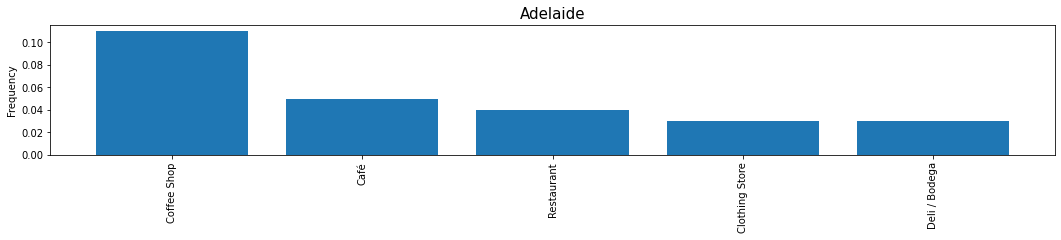

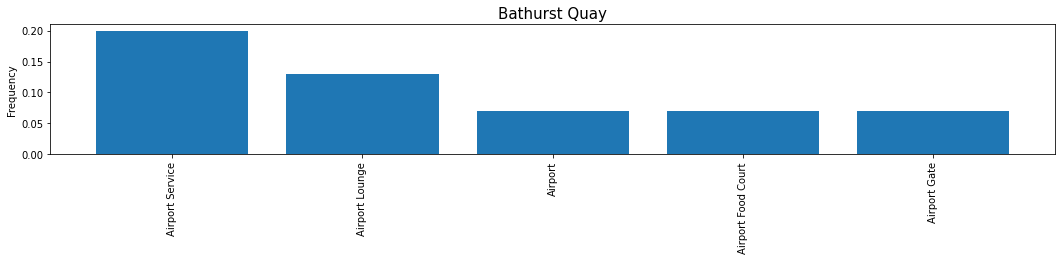

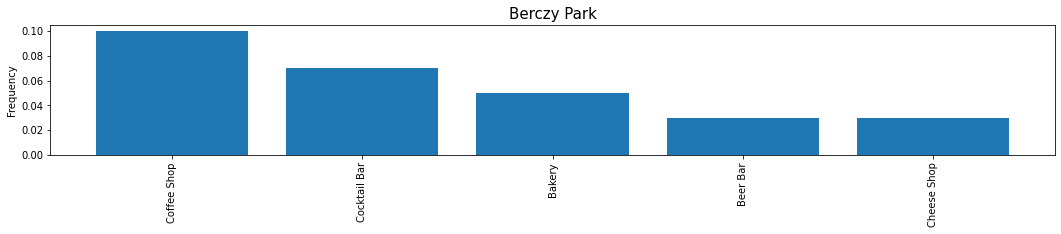

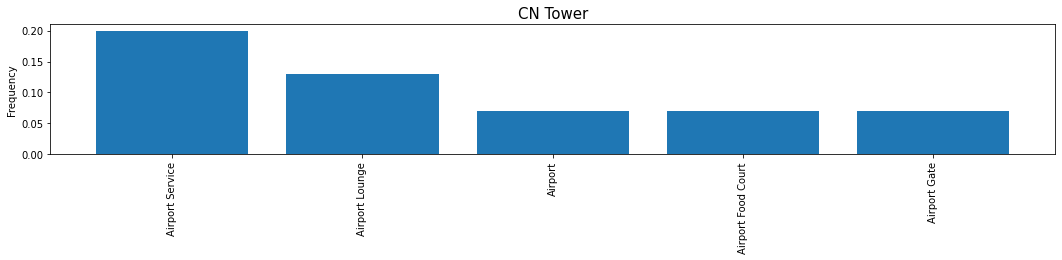

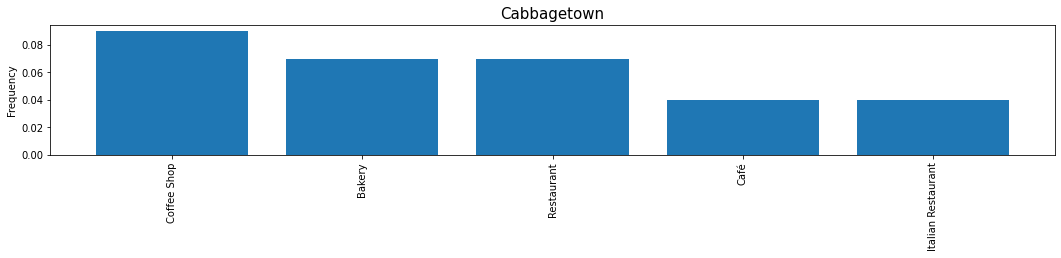

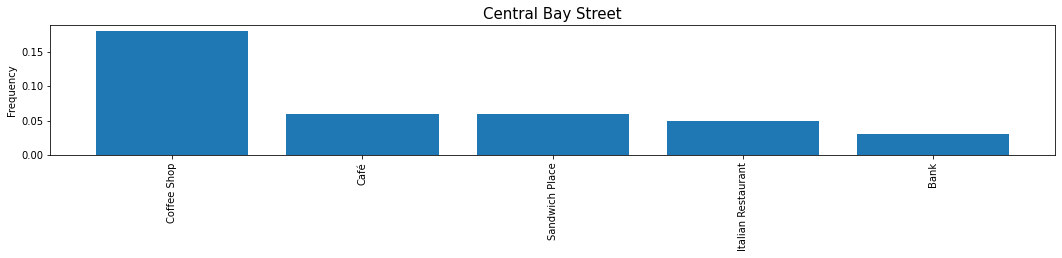

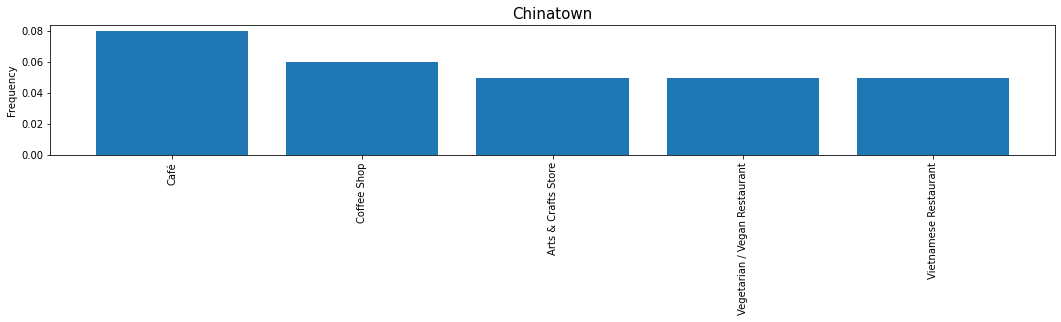

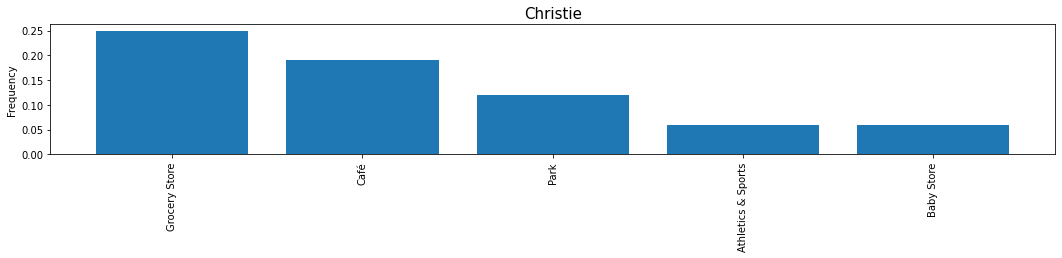

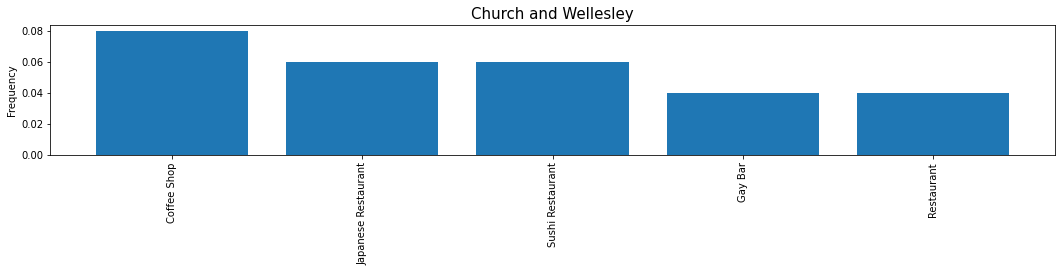

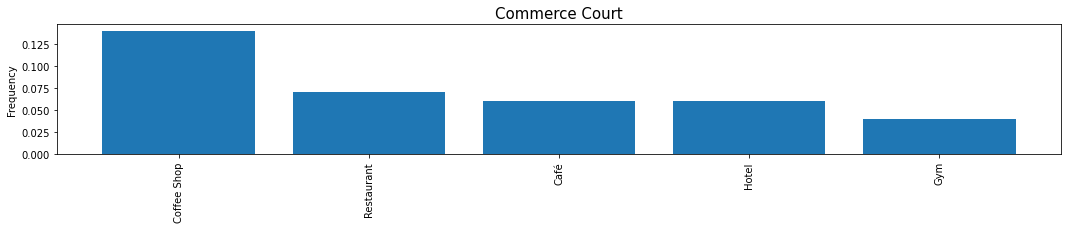

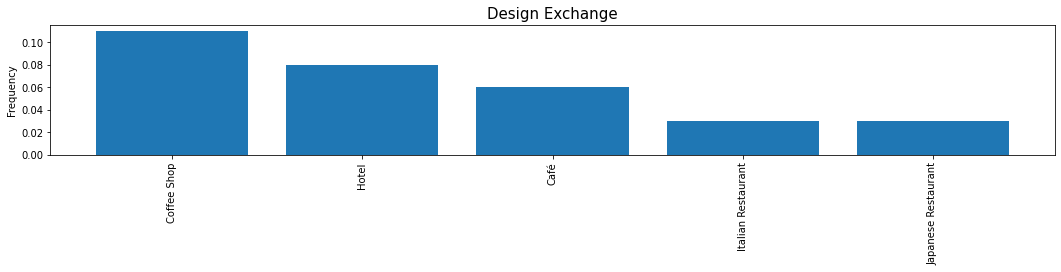

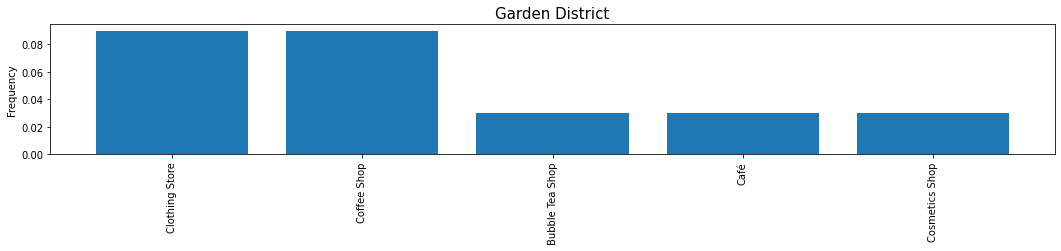

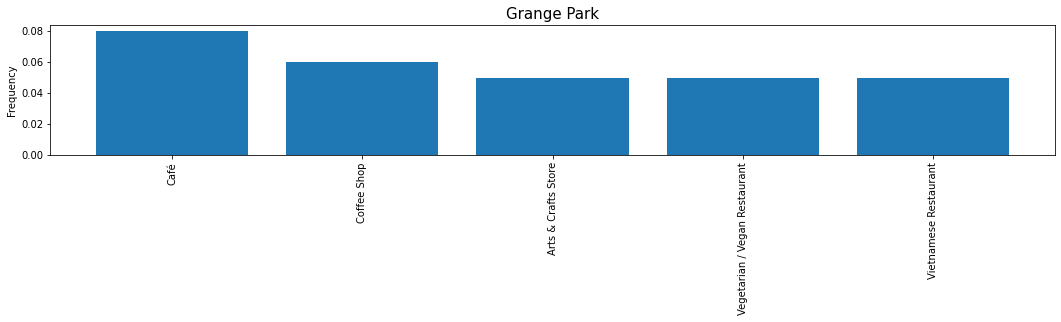

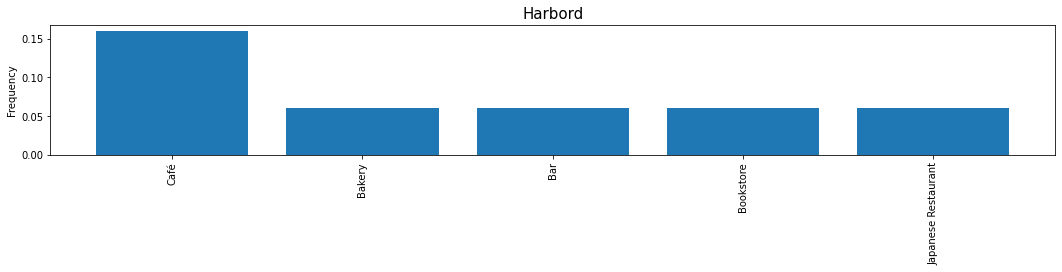

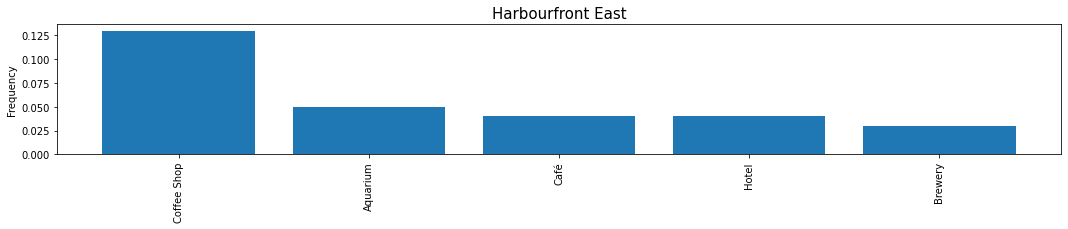

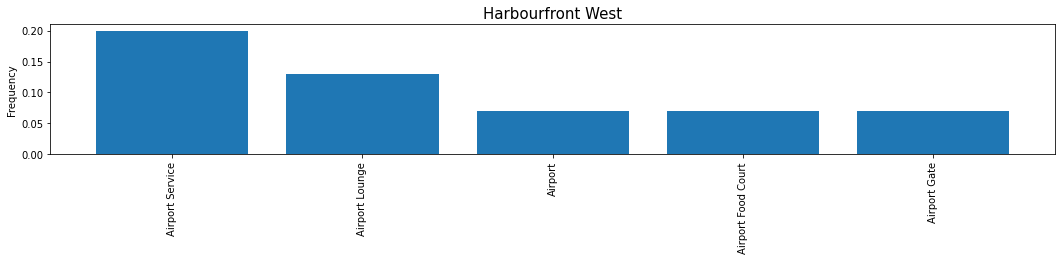

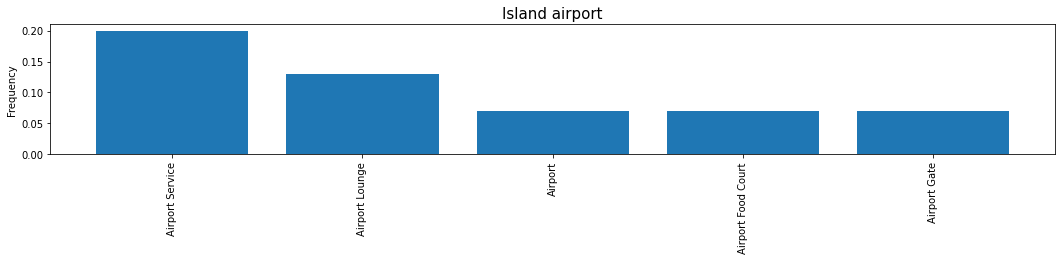

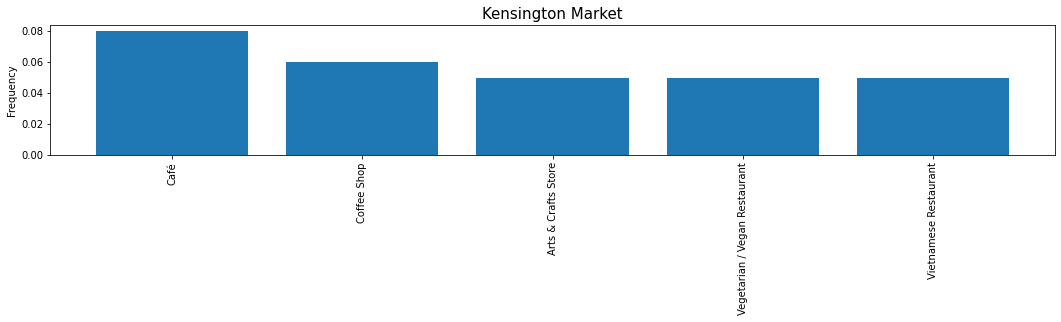

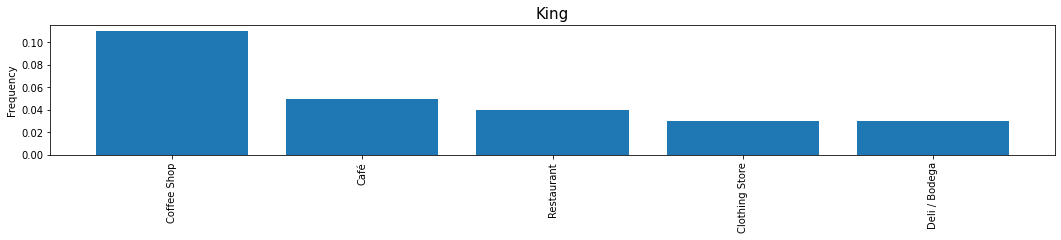

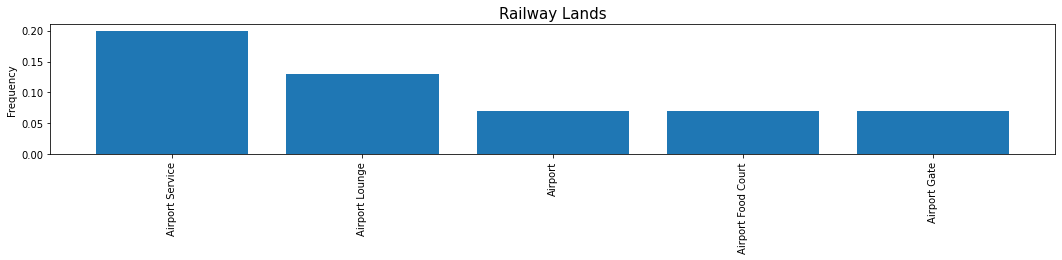

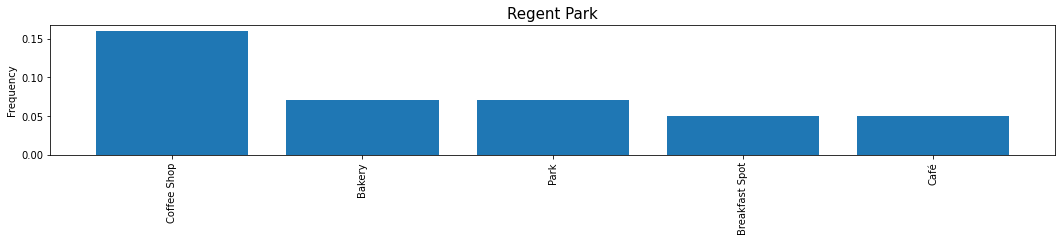

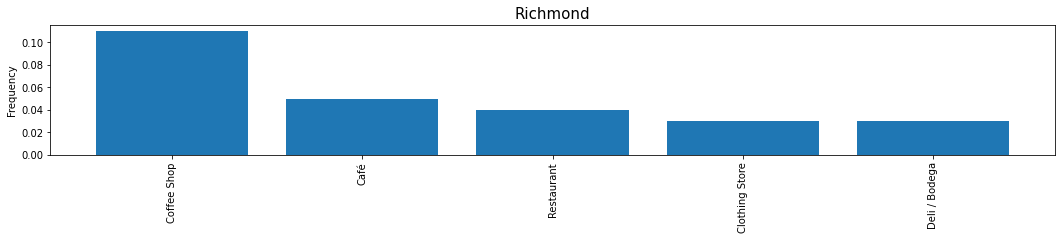

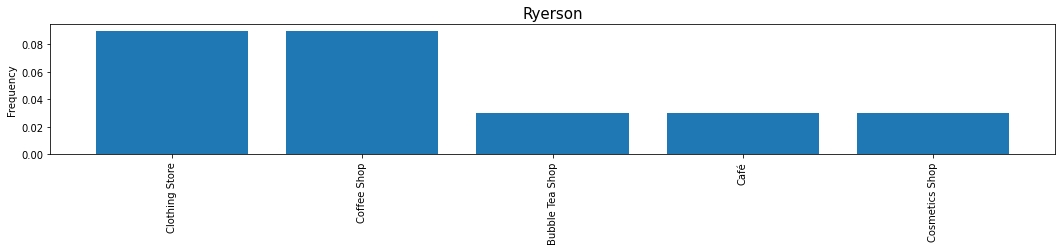

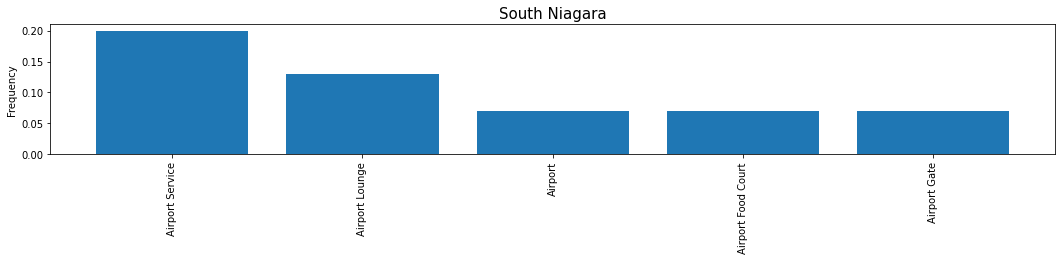

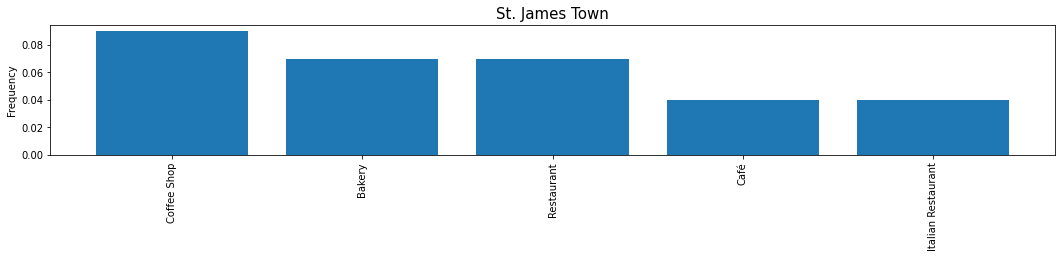

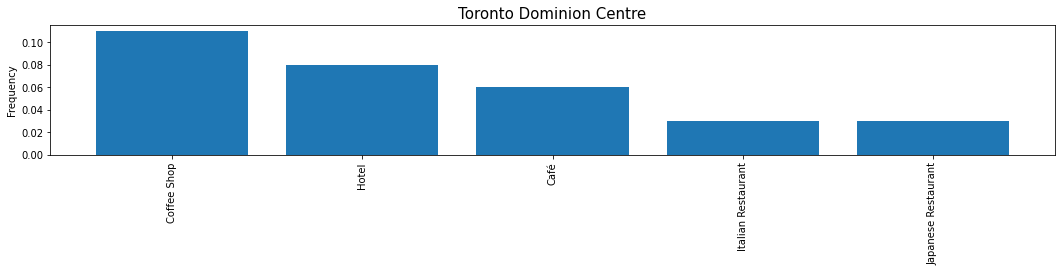

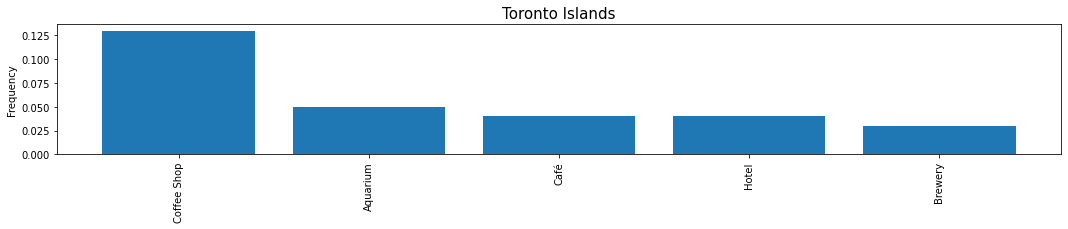

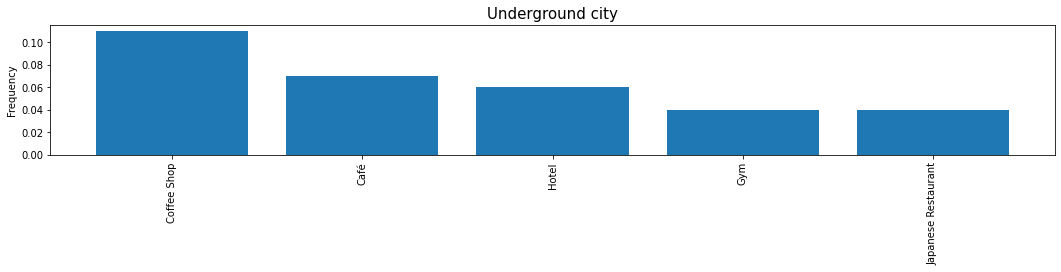

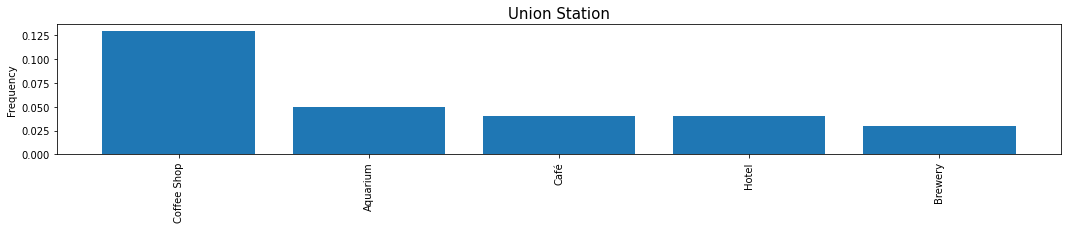

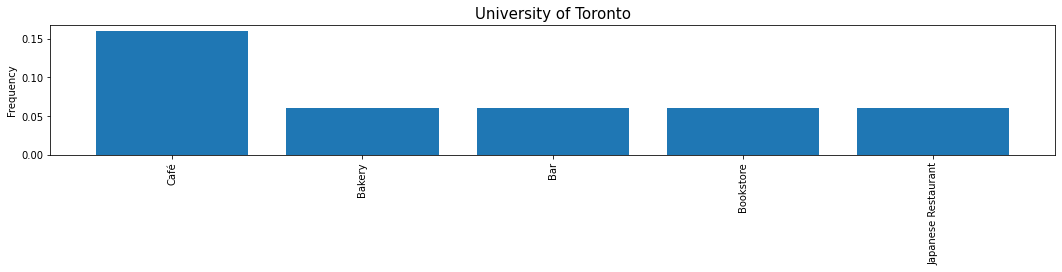

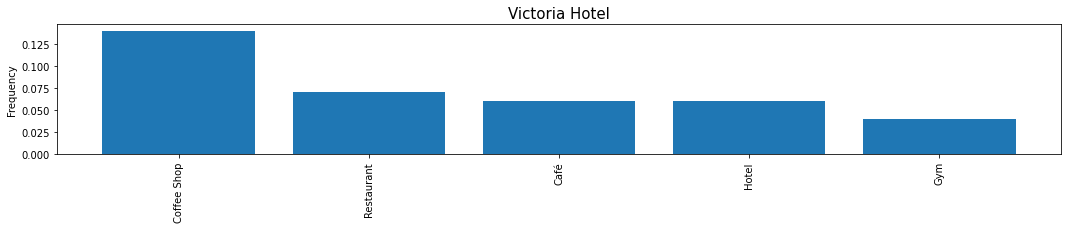

In [35]:
# plot top 5 most common veunes for each neighborhood
for i in range(len(downtown_toronto_grouped['Neighborhoods'])):
    hood = downtown_toronto_grouped['Neighborhoods'].iloc[i]
    temp = downtown_toronto_grouped[downtown_toronto_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    temp = temp.nlargest(5,'freq')
    plt.figure(figsize=(18,100))
    ax = plt.subplot(35,1,i+1)
    x = np.linspace(1,5,5)
    ax.bar(temp['venue'],temp['freq'], align='center')
    ax.tick_params(axis='x',labelrotation=90)
    ax.set_ylabel('Frequency')
    ax.set_title('{}'.format(hood), fontsize=15)


##### Create a dataframe with top 10 venues for each neighborhood

In [36]:
num_top_venues = 10
cols = []
for i in range(num_top_venues):
    try:
        cols.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        cols.append('{}th Most Common Venue'.format(i+1))

downtown_toronto_venues_labeled = pd.DataFrame(columns=cols)
downtown_toronto_venues_labeled.insert(0,'Neighborhoods',downtown_toronto_sorted['Neighborhoods'])

for j in range(downtown_toronto_sorted.shape[0]):
    venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == downtown_toronto_sorted['Neighborhoods'].iloc[j]]
    venues_sorted = venues.nlargest(num_top_venues,'Venue')
    for k in range(num_top_venues): 
        try:
            downtown_toronto_venues_labeled.iloc[j,k+1] = venues_sorted.iloc[k,1]
        except:
            downtown_toronto_venues_labeled.iloc[j,k+1] = np.nan

            

downtown_toronto_venues_labeled.insert(1,'Total Venues',downtown_toronto_venues_total['Venue'])
downtown_toronto_venues_labeled.insert(1,'Latitude',downtown_toronto_sorted['Latitude'])
downtown_toronto_venues_labeled.insert(2,'Longitude',downtown_toronto_sorted['Longitude'])


downtown_toronto_venues_labeled.head()

Neighborhoods   Latitude  Longitude  Total Venues 1th Most Common Venue  \
0       Adelaide  43.650571 -79.384568            92           Coffee Shop   
1  Bathurst Quay  43.628947 -79.394420            15       Airport Service   
2    Berczy Park  43.644771 -79.373306            59           Coffee Shop   
3       CN Tower  43.628947 -79.394420            15       Airport Service   
4    Cabbagetown  43.667967 -79.367675            46           Coffee Shop   

  2th Most Common Venue 3th Most Common Venue 4th Most Common Venue  \
0                  Café            Restaurant        Clothing Store   
1        Airport Lounge               Airport    Airport Food Court   
2          Cocktail Bar                Bakery              Beer Bar   
3        Airport Lounge               Airport    Airport Food Court   
4                Bakery            Restaurant                  Café   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Deli / Bodega                   Gym                 Hotel   
1          Airport Gate      Airport Terminal         Boat or Ferry   
2           Cheese Shop        Farmers Market              Pharmacy   
3          Airport Gate      Airport Terminal         Boat or Ferry   
4    Italian Restaurant             Pet Store           Pizza Place   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0       Thai Restaurant   American Restaurant                 Bakery  
1           Coffee Shop       Harbor / Marina                  Plane  
2            Restaurant    Seafood Restaurant            Art Gallery  
3           Coffee Shop       Harbor / Marina                  Plane  
4                   Pub                  Bank             Beer Store

### Cluster Neighborhoods

Use k-means to cluster the neighborhood

In [37]:
from sklearn.cluster import KMeans
# define number of clusters
kclusters = 8

# prepare the dataset for clustering
downtown_toronto_clustering = downtown_toronto_grouped.drop('Neighborhoods',1)

# clustering
kmeans = KMeans(n_clusters=kclusters,random_state=42)
kmeans.fit(downtown_toronto_clustering)

KMeans(random_state=42)

Add the cluster labels into dataframe

In [38]:
downtown_toronto_venues_labeled.insert(1,'Cluster Labels', kmeans.labels_)            

In [39]:
# quick look at the resultant dataframe
downtown_toronto_venues_labeled.sort_values('Cluster Labels')

Neighborhoods  Cluster Labels   Latitude  Longitude  \
28           St. James Town               0  43.667967 -79.367675   
4               Cabbagetown               0  43.667967 -79.367675   
21         King and Spadina               1  43.628947 -79.394420   
22            Railway Lands               1  43.628947 -79.394420   
27            South Niagara               1  43.628947 -79.394420   
18           Island airport               1  43.628947 -79.394420   
17        Harbourfront West               1  43.628947 -79.394420   
3                  CN Tower               1  43.628947 -79.394420   
1             Bathurst Quay               1  43.628947 -79.394420   
13              Grange Park               2  43.653206 -79.400049   
6                 Chinatown               2  43.653206 -79.400049   
19        Kensington Market               2  43.653206 -79.400049   
25                 Rosedale               3  43.679563 -79.377529   
30          Toronto Islands               4  43.640816 -79.381752   
29  Toronto Dominion Centre               4  43.647177 -79.381576   
31         Underground city               4  43.648429 -79.382280   
26                  Ryerson               4  43.657162 -79.378937   
24                 Richmond               4  43.650571 -79.384568   
32            Union Station               4  43.640816 -79.381752   
20                     King               4  43.650571 -79.384568   
0                  Adelaide               4  43.650571 -79.384568   
16        Harbourfront East               4  43.640816 -79.381752   
12          Garden District               4  43.657162 -79.378937   
11     First Canadian Place               4  43.648429 -79.382280   
10          Design Exchange               4  43.647177 -79.381576   
9            Commerce Court               4  43.648198 -79.379817   
8      Church and Wellesley               4  43.665860 -79.383160   
5        Central Bay Street               4  43.657952 -79.387383   
2               Berczy Park               4  43.644771 -79.373306   
34           Victoria Hotel               4  43.648198 -79.379817   
14                  Harbord               5  43.662696 -79.400049   
33    University of Toronto               5  43.662696 -79.400049   
7                  Christie               6  43.669542 -79.422564   
15             Harbourfront               7  43.654260 -79.360636   
23              Regent Park               7  43.654260 -79.360636   

    Total Venues 1th Most Common Venue 2th Most Common Venue  \
28            46           Coffee Shop                Bakery   
4             46           Coffee Shop                Bakery   
21            15       Airport Service        Airport Lounge   
22            15       Airport Service        Airport Lounge   
27            15       Airport Service        Airport Lounge   
18            15       Airport Service        Airport Lounge   
17            15       Airport Service        Airport Lounge   
3             15       Airport Service        Airport Lounge   
1             15       Airport Service        Airport Lounge   
13            64                  Café           Coffee Shop   
6             64                  Café           Coffee Shop   
19            64                  Café           Coffee Shop   
25             4                  Park            Playground   
30           100           Coffee Shop              Aquarium   
29           100           Coffee Shop                 Hotel   
31           100           Coffee Shop                  Café   
26           100        Clothing Store           Coffee Shop   
24            92           Coffee Shop                  Café   
32           100           Coffee Shop              Aquarium   
20            92           Coffee Shop                  Café   
0             92           Coffee Shop                  Café   
16           100           Coffee Shop              Aquarium   
12           100        Clothing Store           Coffee S

Visualize the resulting clusters

In [40]:
import matplotlib as mp

In [41]:
# create map
map_clusters = folium.Map(location=[downtown_toronto_latitude, downtown_toronto_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = mp.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [mp.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_venues_labeled['Latitude']+r_diff, downtown_toronto_venues_labeled['Longitude']+r_diff, downtown_toronto_venues_labeled['Neighborhoods'], downtown_toronto_venues_labeled['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters